# AyVD- Año 2022

# GRUPO 1- Trabajo práctico entregable parte N°1 - Ejercicio 2
********************************************************************************

Integrantes:

*   Laura Ailin Feu Marquestau
*   Matias Miguel Mengual Figueroa
*   Marcelo Perea
*   Natalia Giselle Tassin
*   Ignacio Villagra Torcomian


In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [ ]:
#Lectura del dataset
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Ejercicio 2 - Densidades y varias variables

# 2. a) Densidad conjunta
*******************************************************************************
CONSIGNA: Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. 
¿Puede describir de alguna forma el comportamiento de sus datos? 
¿Qué herramientas utilizaría? Describa

Para este ejercicio se han seleccionado las siguientes variables del data set:

- `'profile_age'` (numérica)
- `'work_years_in_company'` (numérica)
- `'salary_monthly_neto'` (numérica)
- `'salary_satisfaction'` (categórica)
- `'work_contract_type'` (categórica)

El análisis que se plantea a continuación consiste primero en definir una pregunta acerca del data set, luego seleccionar las variables relacionadas y por último definir un experimento para responder a la inquietud inicial.

Se plantean 3 análisis diferentes.

# Primer análisis: 'profile_age' & 'work_years_in_company'
*******************************************************************************

**HIPÓTESIS:** ¿Se puede determinar que los perfiles más jóvenes tienden a permanecer menos tiempo en las compañías?

DISEÑO DE EXPERIMENTO:

In [ ]:
#Se definen las variables relacionadas a la pregunta a responder

age = 'profile_age'
work_years = 'work_years_in_company'

Selección de filas relevantes de variables:

ANÁLISIS DE LA VARIABLE `'profile_age'`

In [ ]:
df[age].describe().apply(lambda s: '{0:.2f}'.format(s))

count     6095.00
mean        41.18
std        665.72
min         18.00
25%         27.00
50%         31.00
75%         37.00
max      52000.00
Name: profile_age, dtype: object

A simple vista el valor Máximo = 52000 da cuenta que existen valores erróneos. Por lo tanto se analizan los percentiles para determinar qué datos deberían descartarse.

In [ ]:
#Se obtienen los percentiles de la variable Age

df[age].quantile([0.85, .90, .95, .98, .99, .995, .998, 0.999, 1])

0.850       40.000
0.900       42.000
0.950       46.000
0.980       51.000
0.990       54.000
0.995       57.000
0.998       60.000
0.999       63.812
1.000    52000.000
Name: profile_age, dtype: float64

Con este simple análisis se observa que almenos un 0,001% de los datos tienen errores. El percentil 0.999 tiene cerca de 64 años. Entonces para no ser restrictivos se eliminarán los datos con edad mayor o igual a 100 años.

In [ ]:
# Se redefinen variables

df_100= df[df.profile_age < 100]

df_100.shape


(6093, 48)

Si se analiza el tamaño del df modificado (df_100) se puede ver que se eliminaron 2 valores outliers con edades mayores o iguales a 100 años.

(0.0, 100.0)

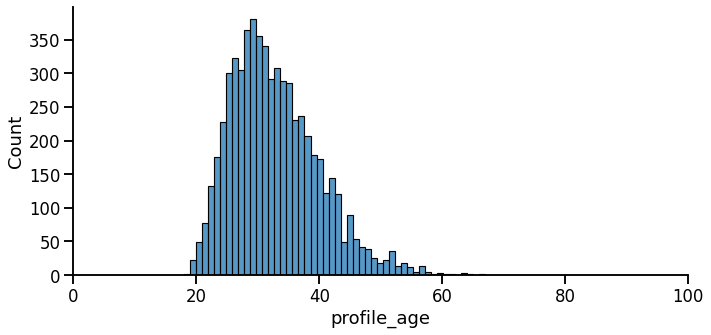

In [ ]:
# Se analizan los datos de EDAD en el dataframe

seaborn.displot(df_100[age], aspect=2, bins = 50) 
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,100)


ANÁLISIS DE LA VARIABLE `'work_years_in_company'`

In [ ]:
df[work_years].describe().apply(lambda s: '{0:.2f}'.format(s))

count    6095.00
mean        3.31
std         4.37
min         0.00
25%         0.00
50%         2.00
75%         4.00
max        43.00
Name: work_years_in_company, dtype: object

In [ ]:
#Se obtienen los percentiles de la variable work_years

df[work_years].quantile([0.85, .90, .95, .98, .99, .995, .998, 0.999, 1])

0.850     7.000
0.900     9.000
0.950    13.000
0.980    16.000
0.990    20.000
0.995    23.000
0.998    26.624
0.999    28.906
1.000    43.000
Name: work_years_in_company, dtype: float64

In [ ]:
#Se analiza el extremo de 43 años de antiguedad para verificar si se trata de un outlier

df_100_test= df[df.work_years_in_company >= 28]

df_100_test. iloc[:, [1,5]]

,profile_age,work_years_in_company
1509,51,28.0
2773,54,30.0
3676,52,29.0
4024,55,29.0
4028,59,40.0
4098,55,28.0
4155,46,28.0
4598,49,29.0
4733,41,43.0
4995,52,28.0


A simple viste se observa que el único caso outlier es el id 4733 ya que profile_age < work_years_in_company y esto indica que el valor es erróneo.

Se elimina este valor extremo del data set.

In [ ]:
df_100_43 = df_100[df_100.work_years_in_company < 43]

Habiéndose corregido la base de datos respecto a estas dos variables se procede a analizar patrones.

Tendiendo en cuenta el siguiente criterio se segmenta la edad en:

- Juventud (14 - 26 años)
- Adultez (27- 59 años)
- Persona Mayor (60 años o mas)

In [ ]:
#Se añade una columna para segmentar la edad de los encuestados de acuerdo al criterio anterior

df_100_43['profile_age'] = pd.to_numeric(df_100_43['profile_age'],errors = 'coerce')

df_100_43['lifecycle'] = np.where((df_100_43['profile_age']<=26), "Juventud" , 
                                  np.where((df_100_43['profile_age']<=59), "Adultez" ,
                                           np.where((df_100_43['profile_age']>59), "Persona Mayor",
                                                    0)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


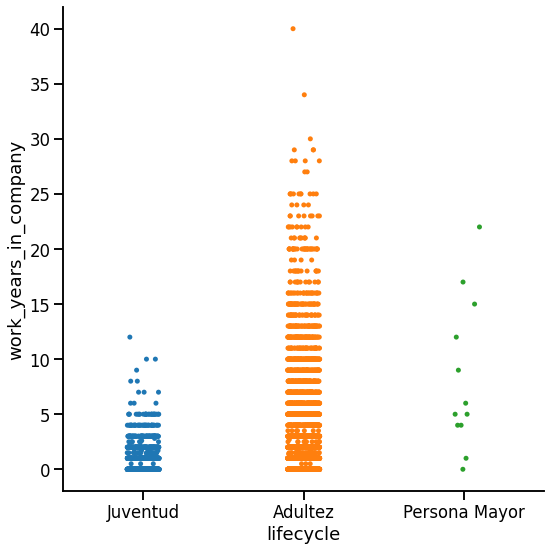

In [ ]:
seaborn.catplot(data=df_100_43, y='work_years_in_company',  
                x='lifecycle', height=8, aspect=1)

Analizando el gráfico anterior se puede concluir:

Tanto en la JUVENTUD como en la ADULTEZ hay mayor probabilidad de tener menos de 5 años de antiguedad.

A partir de esta inferencia, es recomendable profundizar el análisis por segmento de edades:

In [ ]:
# Se crean nuevos dataframes por segmento de edad

df_juventud =df_100_43[df_100_43.lifecycle == "Juventud"]
df_adultez =df_100_43[df_100_43.lifecycle == "Adultez"]
df_persona_mayor =df_100_43[df_100_43.lifecycle == "Persona Mayor"]

([<matplotlib.axis.XTick at 0x7faac7276710>,
 <a list of 16 Text major ticklabel objects>)

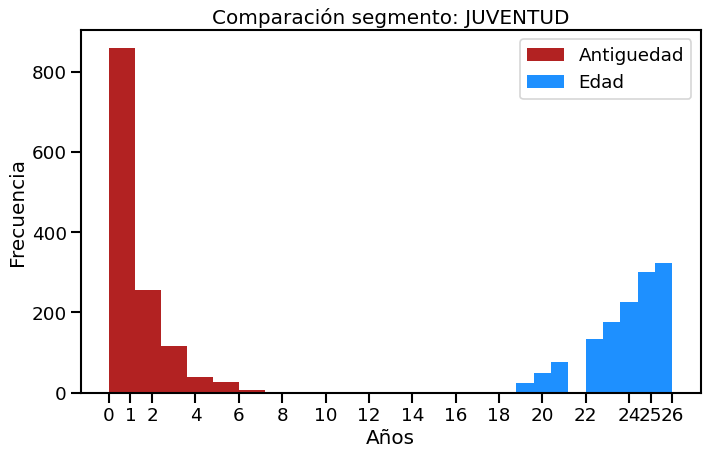

In [ ]:
# Se comparan distribuciones de frecuencias de edad vs antiguedad para el segmento : JUVENTUD

from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

kwargs = dict(histtype='stepfilled', bins=10, align='mid')
plt.hist(data=df_juventud, x='work_years_in_company', color='firebrick', label='x', **kwargs)
plt.hist(data=df_juventud, x='profile_age', color='dodgerblue', label='x', **kwargs);

L=plt.legend(loc='upper right')
L.get_texts()[0].set_text('Antiguedad')
L.get_texts()[1].set_text('Edad')
plt.title('Comparación segmento: JUVENTUD')
plt.ylabel('Frecuencia')
plt.xlabel('Años')

plt.xticks([0,1,2,4,6,8,10,12,14,16,18,20,22,24,25,26])

([<matplotlib.axis.XTick at 0x7faac5046950>,
 <a list of 14 Text major ticklabel objects>)

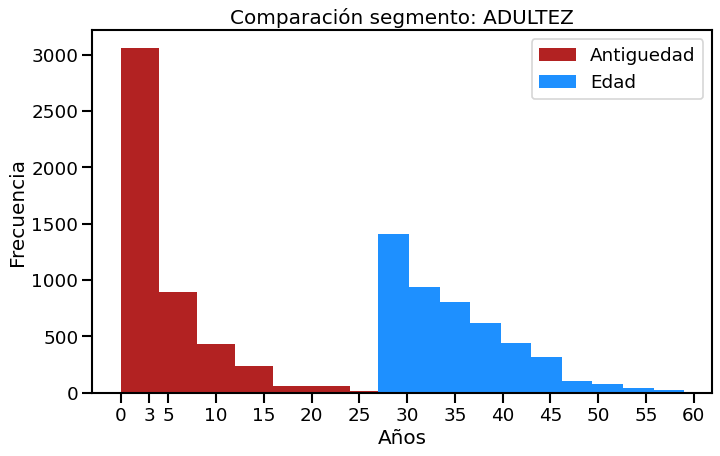

In [ ]:
# Se comparan distribuciones de frecuencias de edad vs antiguedad para el segmento : ADULTEZ

from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

kwargs = dict(histtype='stepfilled', bins=10, align='mid')
plt.hist(data=df_adultez, x='work_years_in_company', color='firebrick', label='x', **kwargs)
plt.hist(data=df_adultez, x='profile_age', color='dodgerblue', label='x', **kwargs);

L=plt.legend(loc='upper right')
L.get_texts()[0].set_text('Antiguedad')
L.get_texts()[1].set_text('Edad')
plt.title('Comparación segmento: ADULTEZ')
plt.ylabel('Frecuencia')
plt.xlabel('Años')

plt.xticks([0,3,5,10,15,20,25,30,35,40,45,50,55,60])

Text(0.5, 0, 'Años')

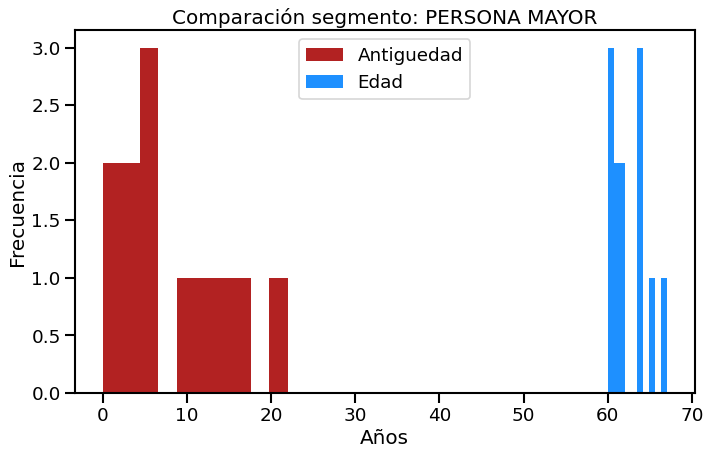

In [ ]:
# Se comparan distribuciones de frecuencias de edad vs antiguedad para el segmento : PERSONA MAYOR

from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

kwargs = dict(histtype='stepfilled', bins=10, align='mid')
plt.hist(data=df_persona_mayor, x='work_years_in_company', color='firebrick', label='x', **kwargs)
plt.hist(data=df_persona_mayor, x='profile_age', color='dodgerblue', label='x', **kwargs);

L=plt.legend(loc='upper center')
L.get_texts()[0].set_text('Antiguedad')
L.get_texts()[1].set_text('Edad')
plt.title('Comparación segmento: PERSONA MAYOR')
plt.ylabel('Frecuencia')
plt.xlabel('Años')

A partir de los gráficos anteriores se puede concluir que **si existe una relación** entre las variables `'profile_age'` y `'work_years_in_company'`.

- De los encuestados dentro del segmento JUVENTUD, la mayoría tiene entre 25 y 26 años de edad con una antiguedad probable menor a 1 año
- De los encuestados dentro del segmento ADULTEZ, la mayoría tiene menos de 30 años con una antiguedad probable menor a 3 años.
- De los encuestados dentro del segmento PERSONA MAYOR, la distribución es más uniforme. No hay una tendencia o la cantidad de datos no sugieren una tendencia clara.


En resumen se podría concluir que entre los 25 y 30 años de edad, es más probable que la antiguedad sea de 0 a 3 años.

# Segundo análisis: 'salary_monthly_NETO' & 'salary_satisfaction'
*******************************************************************************

**HIPÓTESIS:** ¿Cuáles son los salarios netos con mejor satisfacción en el salario?

DISEÑO DE EXPERIMENTO: 

Para el siguiente análisis se trabajará con el dataframe 'df_modif' que contempla los sueldos netos > al salario mínimo vital y movil y < al límite superior de 130.000 (justificación en el Ejercicio 1 del Entregable)

In [ ]:
df_modif = df[(df['salary_monthly_NETO'] >= 20000) & (df['salary_monthly_NETO'] <= 130000)]

In [ ]:
#Se definen las variables

salary = 'salary_monthly_NETO'
satisfaction = 'salary_satisfaction'

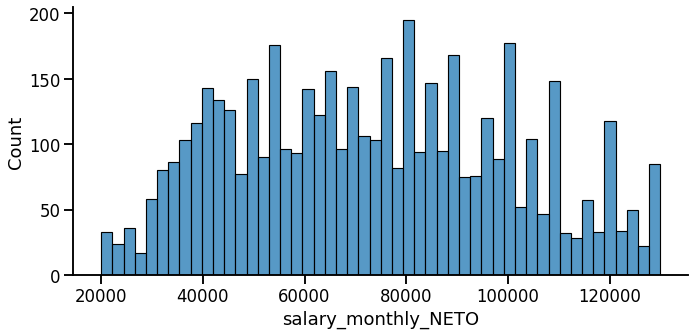

In [ ]:
# Se analizan los datos de salary en el dataframe

seaborn.displot(df_modif['salary_monthly_NETO'], aspect=2, bins = 50) 
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')
#plt.xlim(0,130000)

ANÁLISIS DE LA VARIABLE `'salary_monthly_NETO'`

Para un mejor análisis será necesario segmentar los salarios:

In [ ]:
#Se segmentan los salarios cada 10000 para poder analizar

df_modif_copy = df_modif.copy() #Se realiza una copia del df para eliminar el error: SettingWithCopyWarning

df_modif_copy['salary_range'] = np.where((df_modif_copy['salary_monthly_NETO']<=30000), "20 a 30 mil" , 
                                  np.where((df_modif_copy['salary_monthly_NETO']<=40000), "31 a 40 mil" ,
                                        np.where((df_modif_copy['salary_monthly_NETO']<=50000), "41 a 50 mil" ,
                                           np.where((df_modif_copy['salary_monthly_NETO']<=60000), "51 a 60 mil" ,
                                              np.where((df_modif_copy['salary_monthly_NETO']<=70000), "61 a 70 mil" ,
                                                np.where((df_modif_copy['salary_monthly_NETO']<=80000), "71 a 80 mil" ,
                                                  np.where((df_modif_copy['salary_monthly_NETO']<=90000), "81 a 90 mil" ,
                                                    np.where((df_modif_copy['salary_monthly_NETO']<=100000), "91 a 100 mil" ,
                                                      np.where((df_modif_copy['salary_monthly_NETO']<=110000), "101 a 110 mil" ,
                                                        np.where((df_modif_copy['salary_monthly_NETO']<=120000), "111 a 120 mil" ,     
                                                          np.where((df_modif_copy['salary_monthly_NETO']<=130000), "121 a 130 mil",
                                                    0)))))))))))

df_modif_copy. iloc[:, [29,48]]

,salary_monthly_NETO,salary_range
0,43000.0,41 a 50 mil
1,63000.0,61 a 70 mil
2,127000.0,121 a 130 mil
3,102000.0,101 a 110 mil
4,106000.0,101 a 110 mil
...,...,...
6088,56450.0,51 a 60 mil
6089,130000.0,121 a 130 mil
6090,97000.0,91 a 100 mil
6091,71000.0,71 a 80 mil


In [ ]:
#Se ordenan los segmentos de salary_range

sorted_salary_range = ['20 a 30 mil', '31 a 40 mil', '41 a 50 mil', '51 a 60 mil',
                        '61 a 70 mil', '71 a 80 mil', '81 a 90 mil', '91 a 100 mil', 
                        '101 a 110 mil', '111 a 120 mil', '121 a 130 mil']

ANÁLISIS DE LA VARIABLE `'salary_satisfaction'`

In [ ]:
df_modif[satisfaction].describe().apply(lambda s: '{0:.2f}'.format(s))

count    4801.00
mean        2.51
std         0.83
min         1.00
25%         2.00
50%         3.00
75%         3.00
max         4.00
Name: salary_satisfaction, dtype: object

Con este chequeo rápido se concluye que la escala de satisfacción es de 1 a 4

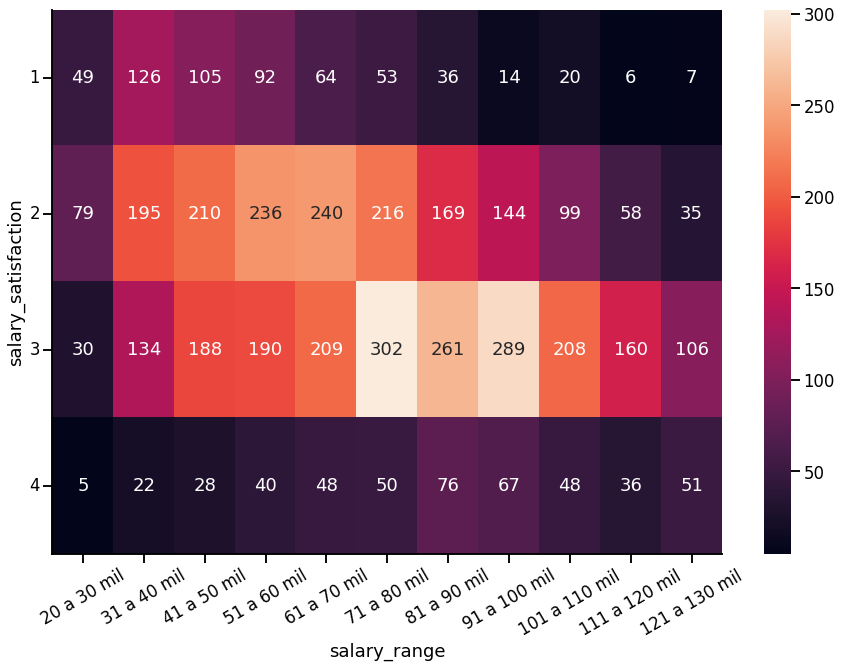

In [ ]:
#Se grafica la distribución de frecuencias en función de dos variables: la segmentación de salarios y las calificaciones

fig = plt.figure(figsize=(15,10))
exp = pd.crosstab(df_modif_copy.salary_satisfaction,
                  df_modif_copy.salary_range)[sorted_salary_range]
seaborn.heatmap(exp, annot=True, fmt='g')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
seaborn.despine()

Del gráfico anterior se puede concluir que:

- Un sueldo neto de 31 a 40 mil es más probable de ser calificado con 1
- Un sueldo neto de 61 a 70 mil es más probable de ser calificado con 2
- Un sueldo neto de 71 a 80 mil es más probable de ser calificado con 3
- Un sueldo neto de 81 a 90 mil es más probable de ser calificado con 4

Es notable que los sueldos altos no tienen mayor probabilidad de ser calificados con 4. Se infiere que los sueldos altos tienen baja frecuencia. Para comprobarlo se analiza la distribución de frecuencias:

In [ ]:
salary_range_count = df_modif_copy.salary_range.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'salary range', 'salary_range': 'frequency'})
salary_range_count.sort_values(by='frequency', ascending=False) 

,salary range,frequency
0,71 a 80 mil,621
1,61 a 70 mil,561
2,51 a 60 mil,558
3,81 a 90 mil,542
4,41 a 50 mil,531
5,91 a 100 mil,514
6,31 a 40 mil,477
7,101 a 110 mil,375
8,111 a 120 mil,260
9,121 a 130 mil,199


Con la tabla de frecuencias anterior se infiere que es correcto decir que los mejores sueldos tienen baja probabilidad de recibir calificaciones altas dado que pocas personas son las que los perciben.

Por otro lado podría decirse que un sueldo de 71 a 80 mil tiene muy altas probabilidades de recibir una calificación 3. La calificación 3 no es la mejor pero es alta. Entonces este sueldo neto se espera sea el que resuelve la relación de compromiso: sueldo neto vs. satisfacción con el sueldo.

# Tercer análisis: 'profile_age' & 'work_contract_type'
******************************************************************


**HIPÓTESIS**: ¿Se puede determinar que los perfiles más jóvenes prefieren el tipo de contrato freelance?

DISEÑO DE EXPERIMENTO:

In [ ]:
#Se definen las variables

age = 'profile_age'
contract_type ='work_contract_type'


ANÁLISIS DE LA VARIABLE `'work_contract_type'`

Se trabajará con `'df_100'` para poder realizar el análisis con la variable `'profile_age'` corregida

In [ ]:
contract_type_count = df.work_contract_type.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'contract type', 'work_contract_type': 'frequency'})
contract_type_count

,contract type,frequency
0,Full-Time,5166
1,Part-Time,310
2,Remoto (empresa de otro país),231
3,Tercerizado (trabajo a través de consultora o ...,219
4,Freelance,169


De la tabla anterior se obtiene que existen 5 categorías para `'work_contract_type'`

In [ ]:
#Se crean dataframes por cada tipo de contrato

df_full_time = df_100[df_100.work_contract_type == "Full-Time"]
df_part_time = df_100[df_100.work_contract_type == "Part-Time"]
df_remoto = df_100[df_100.work_contract_type == "Remoto (empresa de otro país)"]
df_tercerizado = df_100[df_100.work_contract_type == "Tercerizado (trabajo a través de consultora o agencia)"]
df_freelance = df_100[df_100.work_contract_type == "Freelance"]

df_full_time

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN
6092,Hombre,24,Argentina,Ciudad Autónoma de Buenos Aires,2.0,2.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,201-500,Producto basado en Software,7,9,"Capacitaciones y/o cursos, Clases de idiomas, ...",Mercado Libre
6093,Hombre,28,Argentina,La Pampa,5.0,3.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,No,51-100,Servicios / Consultoría de Software / Digital,5,7,Capacitaciones y/o cursos,Solo Nubity


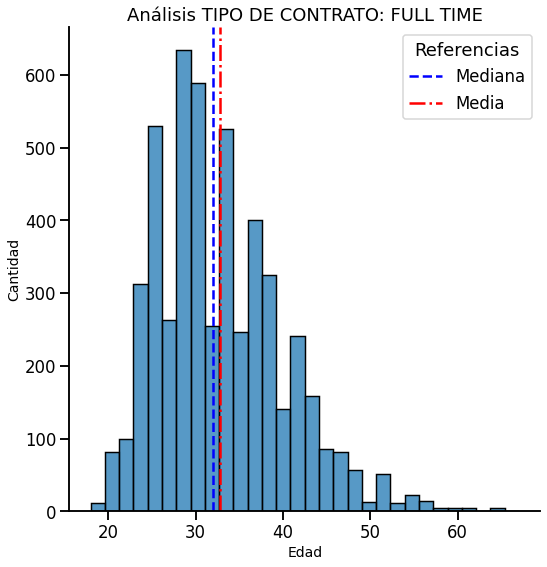

In [ ]:
#Se analiza la distribución de la edad para un tipo de contrato: FULL TIME

seaborn.displot(df_full_time,
            x = "profile_age",
            bins=30,
           height=8).set(title='Análisis TIPO DE CONTRATO: FULL TIME')

plt.xlabel("Edad", size=14)
plt.ylabel("Cantidad", size=14)

axes1 =plt.axvline(df_full_time[age].median(),
            color='blue',
            ls='--',
            lw=2.5)

axes2 =plt.axvline(df_full_time[age].mean(),
            color='red',
            ls='-.',
            lw=2.5)

plt.legend(title='Referencias', loc='upper right', labels=['Mediana', 'Media'])

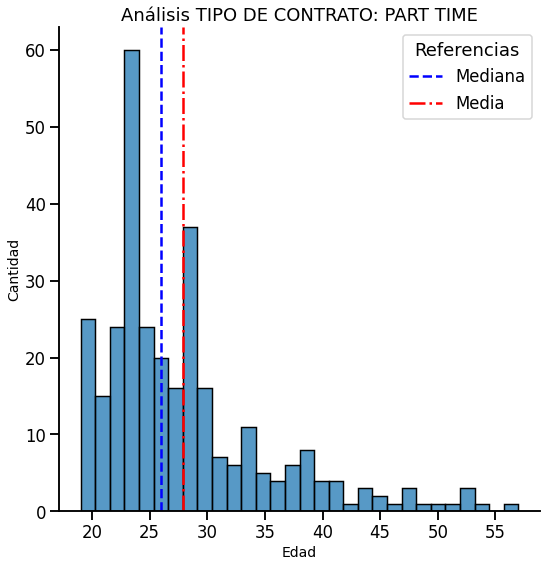

In [ ]:
#Se analiza la distribución de la edad para un tipo de contrato: PART TIME

seaborn.displot(df_part_time,
            x = "profile_age",
            bins=30,
           height=8).set(title='Análisis TIPO DE CONTRATO: PART TIME')

plt.xlabel("Edad", size=14)
plt.ylabel("Cantidad", size=14)

axes1 =plt.axvline(df_part_time[age].median(),
            color='blue',
            ls='--',
            lw=2.5)

axes2 =plt.axvline(df_part_time[age].mean(),
            color='red',
            ls='-.',
            lw=2.5)

plt.legend(title='Referencias', loc='upper right', labels=['Mediana', 'Media'])

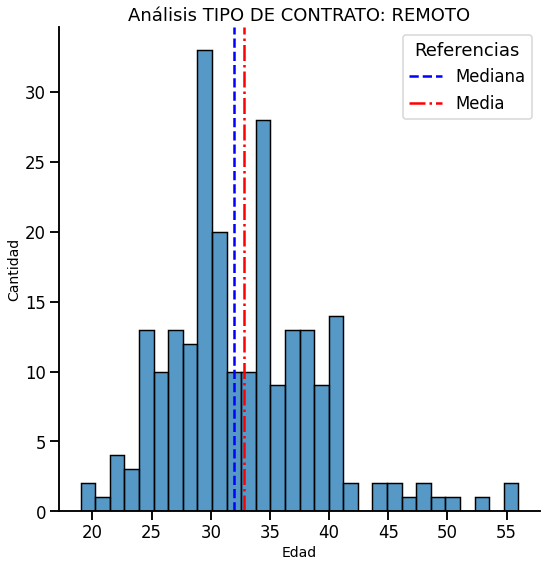

In [ ]:
#Se analiza la distribución de la edad para un tipo de contrato: REMOTO

seaborn.displot(df_remoto,
            x = "profile_age",
            bins=30,
           height=8).set(title='Análisis TIPO DE CONTRATO: REMOTO')

plt.xlabel("Edad", size=14)
plt.ylabel("Cantidad", size=14)

axes1 =plt.axvline(df_remoto[age].median(),
            color='blue',
            ls='--',
            lw=2.5)

axes2 =plt.axvline(df_remoto[age].mean(),
            color='red',
            ls='-.',
            lw=2.5)

plt.legend(title='Referencias', loc='upper right', labels=['Mediana', 'Media'])

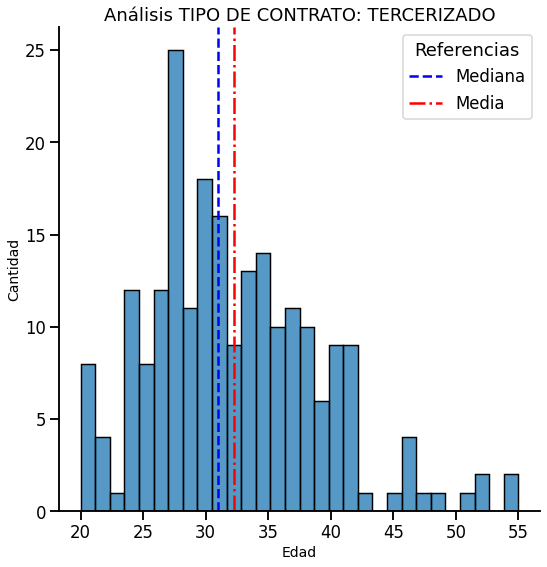

In [ ]:
#Se analiza la distribución de la edad para un tipo de contrato: TERCERIZADO

seaborn.displot(df_tercerizado,
            x = "profile_age",
            bins=30,
           height=8).set(title='Análisis TIPO DE CONTRATO: TERCERIZADO')

plt.xlabel("Edad", size=14)
plt.ylabel("Cantidad", size=14)

axes1 =plt.axvline(df_tercerizado[age].median(),
            color='blue',
            ls='--',
            lw=2.5)

axes2 =plt.axvline(df_tercerizado[age].mean(),
            color='red',
            ls='-.',
            lw=2.5)

plt.legend(title='Referencias', loc='upper right', labels=['Mediana', 'Media'])

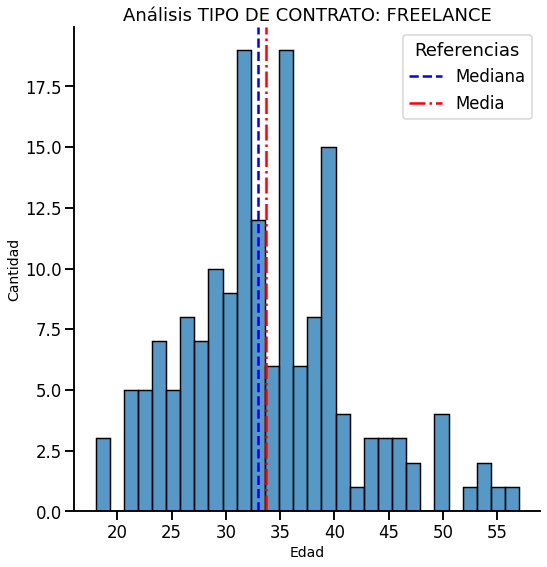

In [ ]:
#Se analiza la distribución de la edad para un tipo de contrato: FREELANCE

seaborn.displot(df_freelance,
            x = "profile_age",
            bins=30,
           height=8).set(title='Análisis TIPO DE CONTRATO: FREELANCE')

plt.xlabel("Edad", size=14)
plt.ylabel("Cantidad", size=14)

axes1 =plt.axvline(df_freelance[age].median(),
            color='blue',
            ls='--',
            lw=2.5)

axes2 =plt.axvline(df_freelance[age].mean(),
            color='red',
            ls='-.',
            lw=2.5)

plt.legend(title='Referencias', loc='upper right', labels=['Mediana', 'Media'])

Analizando las gráficas se puede inferir que en general existe una clara tendencia respecto al TIPO DE CONTRATO: PART TIME en los encuestados entre 25 y 30 años.

Para los otros TIPOS DE CONTRATO existe una alta probabilidad de ser seleccionados por los encuestados entre 30 y 35 años de edad.

#  2. b) Asociación
********************************************************************************

CONSIGNA: Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple. 
¿Existe una correlación entre el salario bruto y el neto? 
¿Qué abordaje y medidas usaría?


Gran parte del análisis de la información contenida en las columnas de 'salary_monthly_NETO' y 'salary_monthly_BRUTO' se hizo en el Ejercicio 1 del Entregable N°1 en las secciones 1.2, 1.2.a y 1.2.b.

Se resumen las ideas principales a continuación:

**Abordaje de análisis desde la estadística descriptiva:**
************************************

Luego de estudiar la estadística descriptiva de ambas columnas con la visualización de histogramas y diagramas de caja, se hizo en primer lugar una "limpieza" del dataset:
*   Outliers inferiores: se decidió eliminar los valores en ambas columnas que fueran MENORES al sueldo mínimo vital y móvil del año 2020. Este valor mínimo fue 20.000 pesos.
*   Outliers superiores en SUELDO NETO: estudiando las medidas de tendencia central de ambas columnas junto con los percentiles luego de establecer el valor mínimo, se pudo determinar que la dispersión de los datos en la columna de sueldo bruto es mucho mayor a la de sueldo neto. Se pudo determinar un valor máximo de 130.000 pesos para la columna de salario neto que representa el percentil .85 de los datos y en donde la media y la mediana se acercan, dando una distribución más simétrica de la información.

* Sin embargo, para trabajar con datos menos dispersos en el SUELDO BRUTO deberíamos trabajar con un percentil menor a k=0.75 (alrededor de 140.000 pesos como valor máximo de sueldo), dejando afuera una cantidad importante de datos. **Es por ello que se concluye que el SUELDO NETO sería una mejor variable para continuar con el análisis y se continúa sólo con esta columna de datos.**




**Abordaje de análisis de posible correlación entre ambas variables**
*************************************

Sin embargo, se puede añadir el análisis de posible corrleación entre ambas columnas. Esto permitiría detectar los valores extraños o erróneos de una manera visual sencilla.

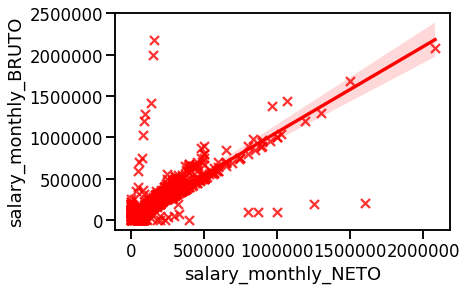

In [ ]:
seaborn.regplot(x=df['salary_monthly_NETO'], y=df['salary_monthly_BRUTO'],fit_reg=True, color='red', marker='x')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

Con la gráfica anterior se puede ver que existen datos en donde el sueldo neto es MAYOR al sueldo bruto, lo cual indica que hay un error ya sea de tipeo o quizás sea un dato que pueda ser descartado.

Podemos modificar el dataframe eliminando estos valores e incorporando el valor mínimo definido en el Ejercicio 1 de 20.000 pesos y valor máximo de 130.000 pesos.

In [ ]:
df_modif.shape

(4801, 48)

In [ ]:
# Se define el nuevo dataframe (df_fixed) a analizar incluyendo solo los valores superiores al límite inferior y eliminando los valores de
# Sueldo NETO que son MAYORES al Sueldo BRUTO.
df['error_tipeo'] = np.where(df['salary_monthly_NETO']>=df['salary_monthly_BRUTO'], 1, 0)
df['fixed'] = np.where((df['salary_monthly_NETO']>20000) & (df['error_tipeo']==0) & (df['salary_monthly_BRUTO']>20000) & (df['salary_monthly_NETO']<130000) & (df['salary_monthly_BRUTO']<130000), 1, 0)
df_fixed= df[df.fixed == 1]

In [ ]:
df_fixed.shape

(3498, 50)

Cuando se comparan dos características diferentes (que pueden tener magnitudes diferentes) puede no ser conveniente comparar directamente los valores de las desviaciones estándar, sino que podemos usar el coeficiente de variación (desviación estándar dividida la media).

Se quiere analizar el coeficiente de variación de ambas columnas:

In [ ]:
import scipy

print("Coeficiente de variación salario bruto",
      scipy.stats.variation(df_modif.salary_monthly_BRUTO))
print("Coeficiente de variación salario neto",
      scipy.stats.variation(df_modif.salary_monthly_NETO.dropna()))

Coeficiente de variación salario bruto 0.5563265973330453
Coeficiente de variación salario neto 0.36763874824785236


Como se analizó en el Ejercicio 1, al ver los valores del coeficiente de variación se observa que la dispersión de los datos en la columna de Sueldo Bruto es mucho mayor a la del Sueldo Neto

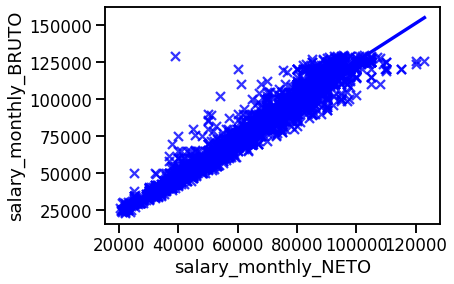

In [ ]:
seaborn.regplot(x=df_fixed['salary_monthly_NETO'], y=df_fixed['salary_monthly_BRUTO'],fit_reg=True, color='blue', marker='x')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
matcov=np.cov(df_fixed.salary_monthly_BRUTO,df_fixed.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_fixed.salary_monthly_BRUTO,df_fixed.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entre ambas variables: ',corr[0,1],'\n')

matriz de varianza covarianza: 
 [[6.99054927e+08 5.16532750e+08]
 [5.16532750e+08 4.01617296e+08]] 

matriz de correlaciones: 
  [[1.         0.97484599]
 [0.97484599 1.        ]] 

correlación entre ambas variables:  0.9748459859584173 



Se puede observar que existen varios datos en donde **el Sueldo Bruto tiene una magnitud mucho mayor a la del Sueldo Neto** (valores con coordenadas bajas en salario neto y alta en sueldo bruto).

Si bien se espera que **Sueldo Bruto > Sueldo Neto**, se sospecha que el porcentaje de descuentos NO puede ser tan alto y que estos datos presentarían anomalías o serían erróneos. 

El análisis del resto de la gráfica y la línea de código anterior indica que existe una **correlación positiva entre ambas variables ya que el coeficiente de Pearson tiene un valor de 0.97**. 

En consecuencia podríamos trabajar únicamente con la columna de Sueldo NETO conociendo que su distribución es menos dispersa.


# 2. c) Densidad condicional
*******************************************************************************

CONSIGNA: Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable 'salary_monthly_NETO' ¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación

Para poder estudiar la distribución del salario neto según el nivel de estudio, primero es de interés conocer cuáles son los niveles de estudio "más numerosos" y luego se eligirán las dos subpoblaciones más numerosas.

In [ ]:
df_fixed['profile_studies_level'].value_counts() 

Universitario    2343
Terciario         740
Secundario        280
Posgrado          119
Doctorado          13
Posdoctorado        2
Primario            1
Name: profile_studies_level, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


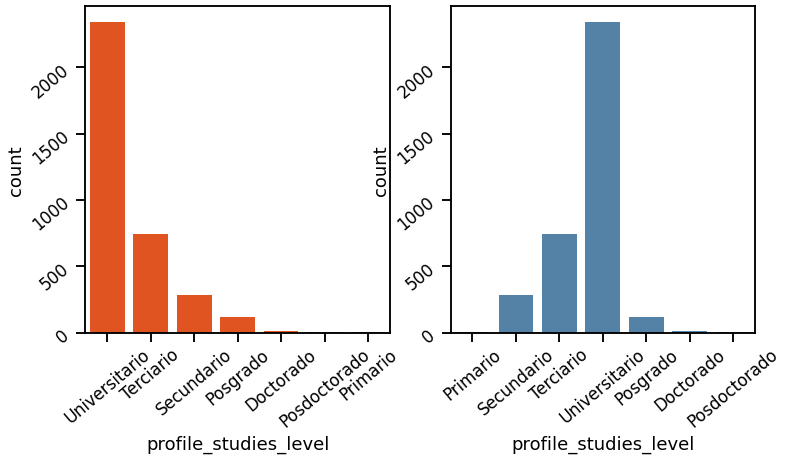

In [ ]:
#Se grafica la distribución de programadores según su nivel de estudio de manera ordenada:
#Se realiza un listado de los nombres de nivel de estudio como categorías ordenadas:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado'] 
fig, axes = plt.subplots(ncols=2, figsize=(12,6)) 
seaborn.countplot(df_fixed.profile_studies_level, color='orangered', ax=axes[0]) 
seaborn.countplot(df_fixed.profile_studies_level, color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)      
for ax in axes:
  ax.tick_params(labelrotation=40)  

Se elige la subpoblación de programadores que tienen nivel UNIVERSITARIO y TERCIARIO por ser las dos más numerosas del total de la población encuestada.

In [ ]:
#Se genera un nuevo data frame (df_nivel) que sólo contiene las columnas de interés: las de nivel de estudio y la de sueldo neto
df_studies = df_fixed.loc[:,['profile_studies_level','salary_monthly_NETO']]
df_studies.head()

,profile_studies_level,salary_monthly_NETO
0,Universitario,43000.0
1,Universitario,63000.0
5,Terciario,44000.0
6,Universitario,62400.0
7,Terciario,37500.0


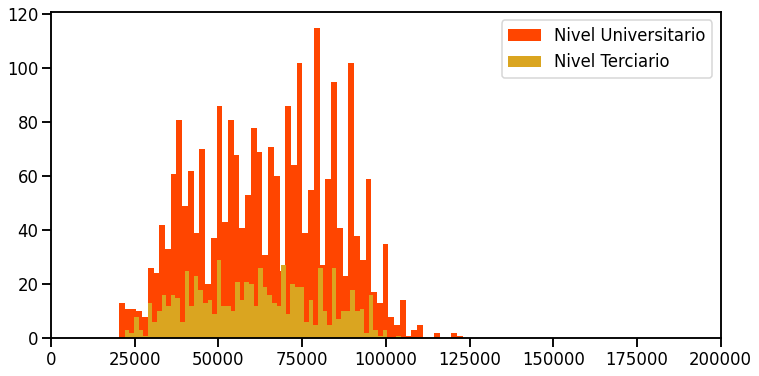

In [ ]:
#Se busca generar dos data frame diferentes segun el nivel de estudio seleccionado y graficar ambos histogramas juntos:

df_univ= df_studies[df_studies['profile_studies_level']=='Universitario']
df_terc= df_studies[df_studies['profile_studies_level']=='Terciario']

plt.figure(figsize=(12, 6))
plt.hist(df_univ['salary_monthly_NETO'], color='orangered', bins=60, label='Nivel Universitario')
plt.hist(df_terc['salary_monthly_NETO'], color='goldenrod', bins=60, label='Nivel Terciario') 
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,200000)
plt.legend()
plt.show()

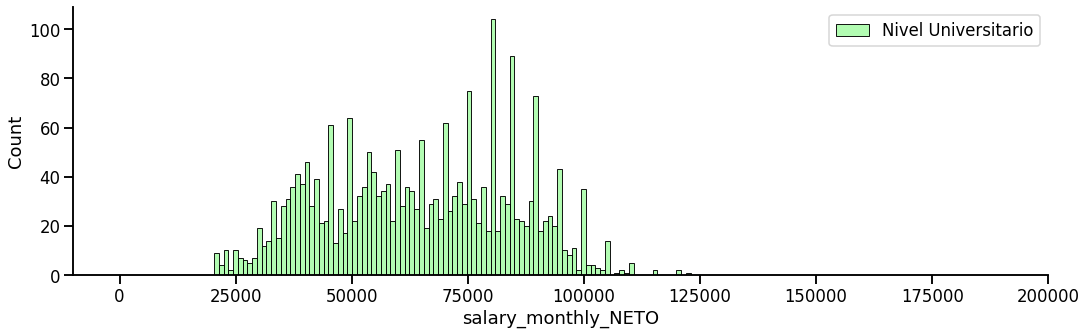

In [ ]:
#VISUALIZACIÓN DE DATOS: Histograma de "salary_neto" para programadores que tienen "nivel universitario"
seaborn.displot(df_univ["salary_monthly_NETO"], aspect=3, bins = 100, color='palegreen', label='Nivel Universitario') 
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-10000,200000)
plt.legend()

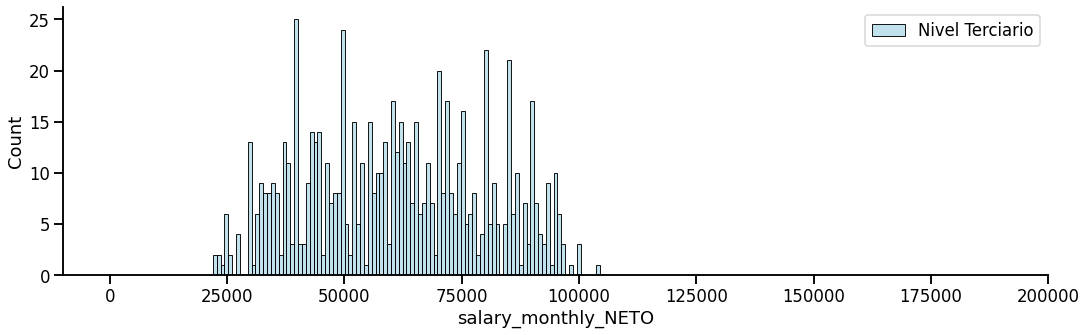

In [ ]:
#VISUALIZACIÓN DE DATOS: Histograma de "salary_neto" para programadores que tienen "nivel terciario"
seaborn.displot(df_terc["salary_monthly_NETO"], aspect=3, bins = 100, color='lightblue', label='Nivel Terciario') 
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-10000,200000)
plt.legend()

En los histogramas previos, se pueden ver distribuciones MUY similares para ambas subpoblaciones de programadores.
Pareciera que no hay una relación directa y clara entre estas dos variables.

******************************************************************************
Se calculan las medidas de tendencia central para cada una de las subpoblaciones elegidas: NIVEL UNIVERSITARIO y NIVEL TERCIARIO.

In [ ]:
df_univ[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,2343.0
mean,64648.0
std,20248.0
min,20346.0
25%,48985.0
50%,65000.0
75%,80000.0
max,123000.0


In [ ]:
df_terc[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,740.0
mean,61182.0
std,19050.0
min,21995.0
25%,45000.0
50%,61000.0
75%,75000.0
max,104499.0


In [ ]:
print(df_univ['salary_monthly_NETO'].median())
print(df_terc['salary_monthly_NETO'].median())

65000.0
61000.0


In [ ]:
print("Coeficiente de variación salario neto para subpoblación con nivel universitario",
      scipy.stats.variation(df_univ.salary_monthly_NETO))
print("Coeficiente de variación salario neto para subpoblación con nivel terciario",
      scipy.stats.variation(df_terc.salary_monthly_NETO.dropna()))

Coeficiente de variación salario neto para subpoblación con nivel universitario 0.31313595559501967
Coeficiente de variación salario neto para subpoblación con nivel terciario 0.311152824016878


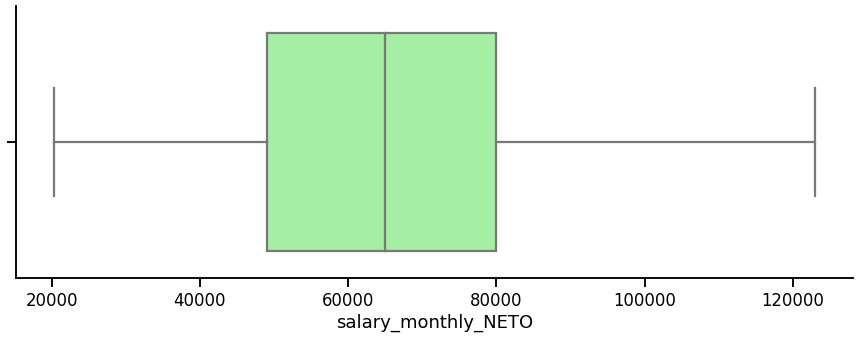

In [ ]:
#Gráfico de caja para sueldo neto para subpoblación con nivel Universitario
plt.figure(figsize=(15, 5))
seaborn.boxplot(x=df_univ["salary_monthly_NETO"], color='palegreen')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

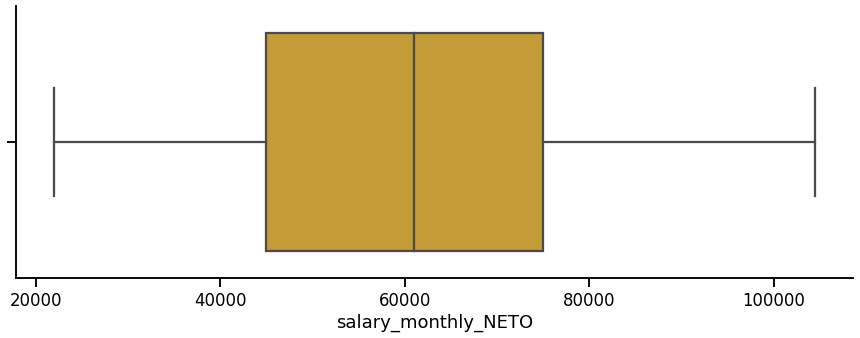

In [ ]:
#Gráfico de caja para sueldo neto para subpoblación con nivel Terciario
plt.figure(figsize=(15, 5))
seaborn.boxplot(x=df_terc["salary_monthly_NETO"], color='goldenrod')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

In [ ]:
print(df_univ.salary_monthly_NETO.min(), df_univ.salary_monthly_NETO.max())
print(df_terc.salary_monthly_NETO.min(), df_terc.salary_monthly_NETO.max())

20346.0 123000.0
21995.0 104499.0


In [ ]:
#Medidas de tendencia central para la columna de SALARIO NETO en subpoblación Nivel Universitario
max_salaries = [df_univ["salary_monthly_NETO"].max(), 10**6, 800000, 600000,400000, 200000, 100000, 90000, 80000, 60000, 40000]
central_tendency = [
    (max_salary, df_univ[df_univ["salary_monthly_NETO"] < max_salary]["salary_monthly_NETO"].mean(),
     df_univ[df_univ["salary_monthly_NETO"] < max_salary]["salary_monthly_NETO"].median())
    for max_salary in max_salaries
]
central_tendency

[(123000.0, 64623.15508112725, 65000.0),
 (1000000, 64648.07050789587, 65000.0),
 (800000, 64648.07050789587, 65000.0),
 (600000, 64648.07050789587, 65000.0),
 (400000, 64648.07050789587, 65000.0),
 (200000, 64648.07050789587, 65000.0),
 (100000, 63439.43734271889, 64000.0),
 (90000, 60063.69598039216, 60498.884999999995),
 (80000, 54838.26563473054, 55000.0),
 (60000, 44363.24044284243, 45000.0),
 (40000, 33608.74766871166, 35000.0)]

In [ ]:
#Medidas de tendencia central para la columna de SALARIO NETO en subpoblación Nivel Terciario
max_salaries = [df_terc["salary_monthly_NETO"].max(), 10**6, 800000, 600000,400000, 200000, 100000, 90000, 80000, 60000, 40000]
central_tendency = [
    (max_salary, df_terc[df_terc["salary_monthly_NETO"] < max_salary]["salary_monthly_NETO"].mean(),
     df_terc[df_terc["salary_monthly_NETO"] < max_salary]["salary_monthly_NETO"].median())
    for max_salary in max_salaries
]
central_tendency

[(104499.0, 61123.06935047363, 61000.0),
 (1000000, 61181.68547297298, 61000.0),
 (800000, 61181.68547297298, 61000.0),
 (600000, 61181.68547297298, 61000.0),
 (400000, 61181.68547297298, 61000.0),
 (200000, 61181.68547297298, 61000.0),
 (100000, 60964.60360054349, 61000.0),
 (90000, 58185.38146233384, 59000.0),
 (80000, 53928.296144578315, 55000.0),
 (60000, 44121.26695402299, 44000.0),
 (40000, 33078.06009009009, 34000.0)]

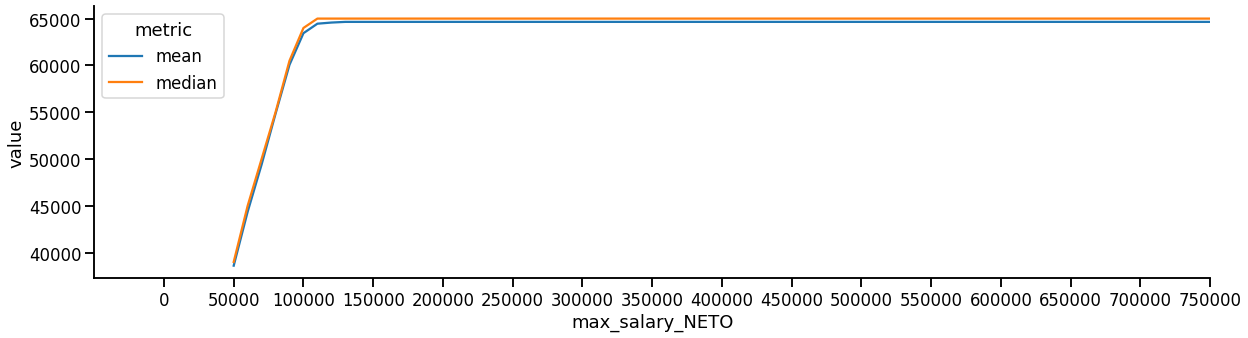

In [ ]:
#Para visualizar en forma gráfica la tabla anterior. Se calcula la tendencia central máxima del SALARIO NETO en df_univ

central_tendency_max = [
    (max_salary, df_univ[df_univ["salary_monthly_NETO"] < max_salary]["salary_monthly_NETO"].mean(),
     df_univ[df_univ["salary_monthly_NETO"] < max_salary]["salary_monthly_NETO"].median())
    for max_salary in range(50000, int(df["salary_monthly_NETO"].max()), 10**4)
]
central_tendency_max_SN_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary_NETO', 'mean', 'median'])\
  .melt(id_vars='max_salary_NETO', var_name='metric')


#A continuación se realiza la representación gráfica de la MEDIA y la MEDIANA para el SALARIO NETO
fig = plt.figure(figsize=(20, 5))
seaborn.lineplot(data=central_tendency_max_SN_df, x='max_salary_NETO', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-50000,350000)
plt.xticks( range(0,800000,50000) )
seaborn.despine()

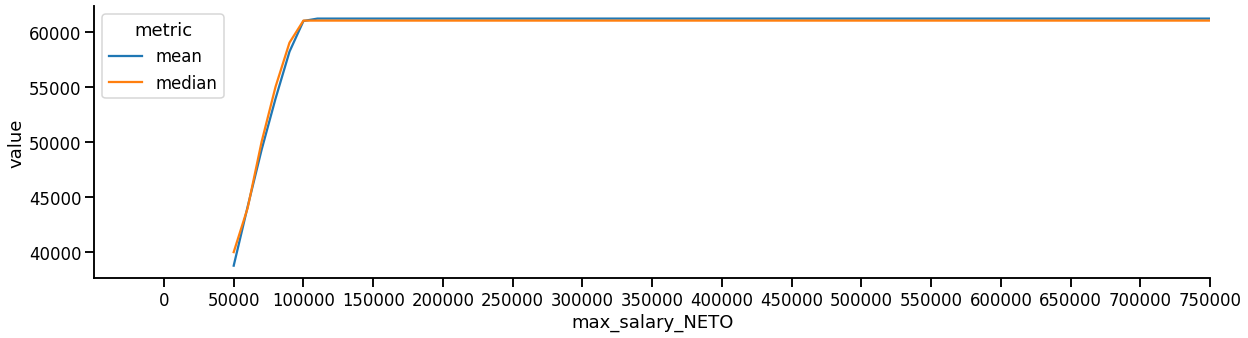

In [ ]:
#Para visualizar en forma gráfica la tabla anterior. Se calcula la tendencia central máxima del SALARIO NETO en df_terc
central_tendency_max = [
    (max_salary, df_terc[df_terc["salary_monthly_NETO"] < max_salary]["salary_monthly_NETO"].mean(),
     df_terc[df_terc["salary_monthly_NETO"] < max_salary]["salary_monthly_NETO"].median())
    for max_salary in range(50000, int(df["salary_monthly_NETO"].max()), 10**4)
]
central_tendency_max_SN_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary_NETO', 'mean', 'median'])\
  .melt(id_vars='max_salary_NETO', var_name='metric')


#A continuación se realiza la representación gráfica de la MEDIA y la MEDIANA para el SALARIO NETO
fig = plt.figure(figsize=(20, 5))
seaborn.lineplot(data=central_tendency_max_SN_df, x='max_salary_NETO', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(-50000,350000)
plt.xticks( range(0,800000,50000) )
seaborn.despine()

Aparentemente la variable salario con la variable nivel de estudios serían independientes en las dos subpoblaciones estudiadas (nivel universitario y nivel terciario)

Las distribuciones de salario vistas en los histogramas son muy similares para ambas subpoblaciones, sólo diferenciándose en la cantidad de programadores (la frecuencia).

Se puede analizar que las dos subpoblaciones elegidas (las que reunen a la mayoria de los encuestados) representan nivel de estudios de grado y terciario, ambos niveles de estudios superiores al nivel secundario por ejemplo.
Entonces, si se analiza la distribución de salarios de la subpoblación de programadores que alcanzó sólo el nivel secundario y se compara con otra subpoblación que alcanzó un nivel de formación mayor, si se puede concluir que hay una relación entre el salario y la educación.


# 2. d) Densidad Conjunta condicional
*******************************************************************************

CONSIGNA: Elija dos variables numéricas y una categórica. Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)

Las variables seleccionadas son:

- `'salary_monthly_NETO'` (Numérica)
- `'profile_age'` (Numérica)
- `'profile_gender'` (Categórica)

Para la variable `'salary_monthly_NETO'` se trabajará con el dataframe df_modif ya que tiene correcciones de outliers.

Para la variable `'profile_age'` se trabajara con el dataframe df_100 para corregir los outliers con edad mayor a 100 años

In [ ]:
# Para poder trabajar con un solo dataframe se aplicará la siguiente sentencia

df_conjunta= df_modif[df_modif.profile_age < 100]

df_conjunta

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,Hombre,32,Argentina,Provincia de Buenos Aires,13.0,0.0,3.0,0,Secundario,Completado,...,Jamás,Heterosexual,NaN,No,101-200,Servicios / Consultoría de Software / Digital,9,9,"Abono de celular, Clases de gimnasia online, C...",NaN
6089,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,10.0,3.0,0.0,0,Universitario,Completado,...,En mi trabajo actual,Heterosexual,NaN,NaN,2001-5000,Otras industrias,7,8,"Capacitaciones y/o cursos, Clases de gimnasia ...",NaN
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN


In [ ]:
# Se definen las variables

age = 'profile_age'
gender = 'profile_gender'
salary = 'salary_monthly_NETO'

Se analiza la variable `'profile_gender'`

In [ ]:
#Se analiza la variable género

gender_count = df_conjunta.profile_gender.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Gender', 'profile_gender': 'frequency'})
gender_count

,Gender,frequency
0,Hombre,3996
1,Mujer,782
2,Otros,21


In [ ]:
import plotly.express as px

fig = px.scatter(df_conjunta, x="salary_monthly_NETO", y="profile_age", color="profile_gender",
                 size="salary_monthly_NETO", size_max=20 ,labels={"salary_monthly_NETO": "Salario", "profile_gender": "Género","profile_age": "Edad"},
                 category_orders={"profile_gender": ["Hombre", "Mujer", "Otros"]},marginal_x="histogram", marginal_y="histogram")

fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

En el gráfico anterior se puede observar que:

- La población de Hombres encuestados predomina ante los otros géneros
- El punto anterior puede generar un sesgo en los datos. Sin embargo a priori podría inferirse que el salario en el género masculino puede ser mayor a los otros géneros. Esto es debido a que gráficamente se puede observar que el histograma de género femenino tiende a una media < a la media de salarios del género masculino.
- El salario del genero "otros" tiene una distribución muy dispersa.
- En cuanto a la variable edad, se puede ver una distribución similar en todos los géneros. La media en todos los géneros tiende a ser aproximadamente 30 años de edad.
*************************************
